In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
data_norm = StandardScaler().fit_transform(data)
data_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# DBSCAN

In [7]:
dbscan = DBSCAN(eps =1,min_samples=4)
dbscan.fit(data_norm)

DBSCAN(eps=1, min_samples=4)

In [8]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [9]:
data['clusters']=dbscan.labels_
data

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [11]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


<Axes: xlabel='Murder', ylabel='Assault'>

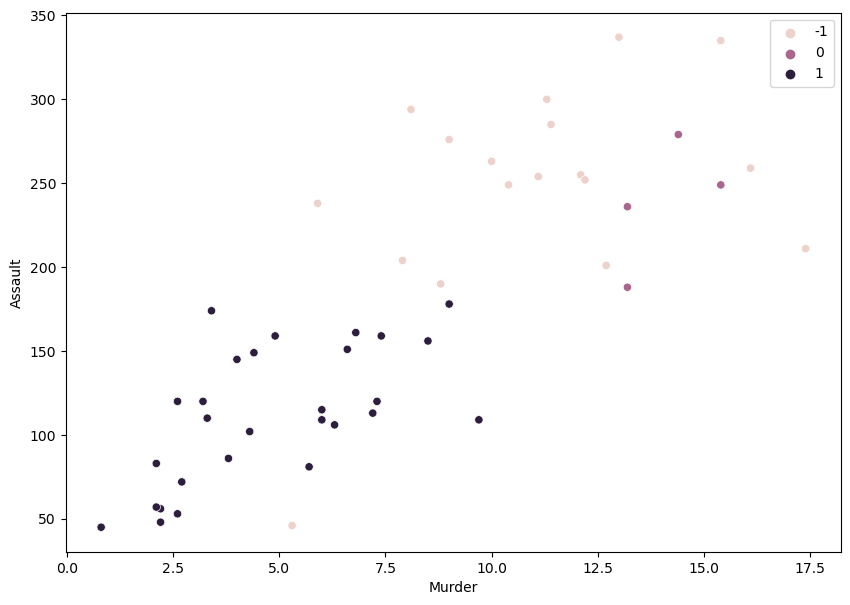

In [12]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data['Murder'],y=data['Assault'],hue=dbscan.labels_)

# KMeans

In [13]:
model = KMeans(n_clusters=4)
y_pred=model.fit_predict(data_norm)
print(y_pred)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 1 1 0 1 1 3 3 1 0 3 2 1 3 2 3 2 0 2 1 3 1 2 0 1 2 2 1 2 3 1 1 0 2 3 3 3
 3 3 0 2 0 1 3 2 3 3 2 2 3]


In [14]:
data['cluster'] = y_pred+1
data.head()

,Murder,Assault,UrbanPop,Rape,clusters,cluster
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,-1,2
2,8.1,294,80,31.0,-1,2
3,8.8,190,50,19.5,-1,1
4,9.0,276,91,40.6,-1,2


<Axes: xlabel='Murder', ylabel='Assault'>

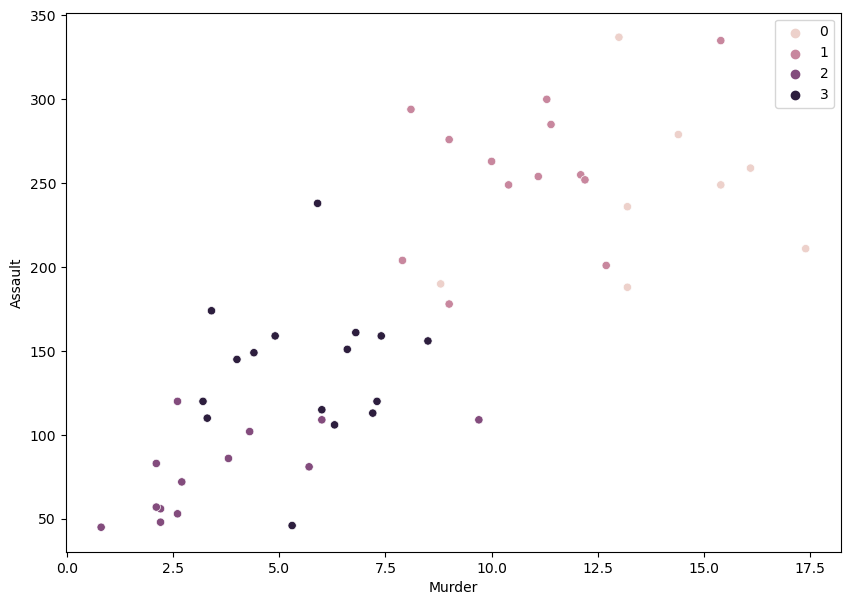

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data['Murder'],y=data['Assault'],hue=y_pred)

In [16]:
data[data['cluster']==1]

,Murder,Assault,UrbanPop,Rape,clusters,cluster
0,13.2,236,58,21.2,0,1
3,8.8,190,50,19.5,-1,1
9,17.4,211,60,25.8,-1,1
17,15.4,249,66,22.2,0,1
23,16.1,259,44,17.1,-1,1
32,13.0,337,45,16.1,-1,1
39,14.4,279,48,22.5,0,1
41,13.2,188,59,26.9,0,1


# HIERARICAL

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4,affinity='l2',linkage='complete')
x_pred = model.fit_predict(data_norm)
x_pred

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

<Axes: xlabel='Murder', ylabel='Assault'>

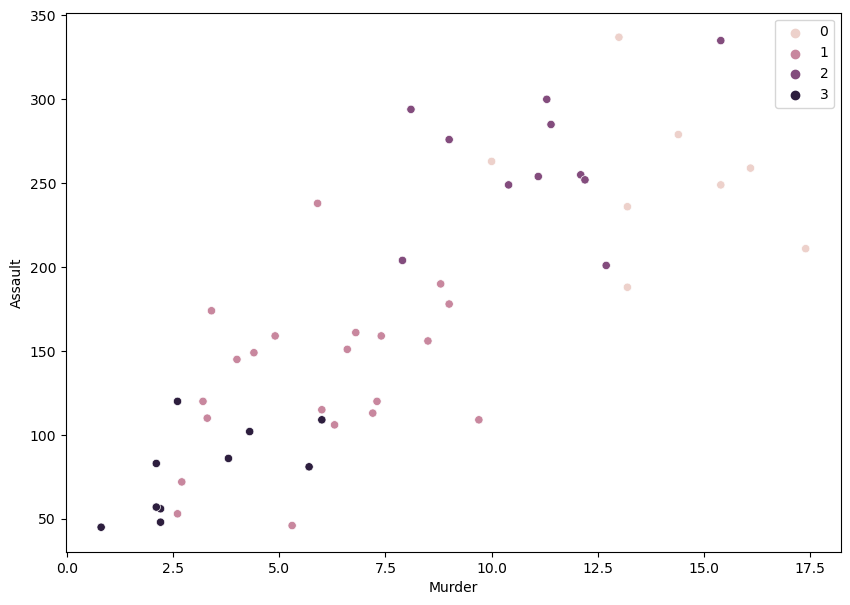

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data['Murder'],y=data['Assault'],hue=x_pred)

# ELBOW METHOD

In [20]:
nc=range(1,11)
l=[]
for i in nc:

    model=KMeans(n_clusters=i)
    model.fit(data_norm)
    l.append(model.inertia_)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_3024\4072156312.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


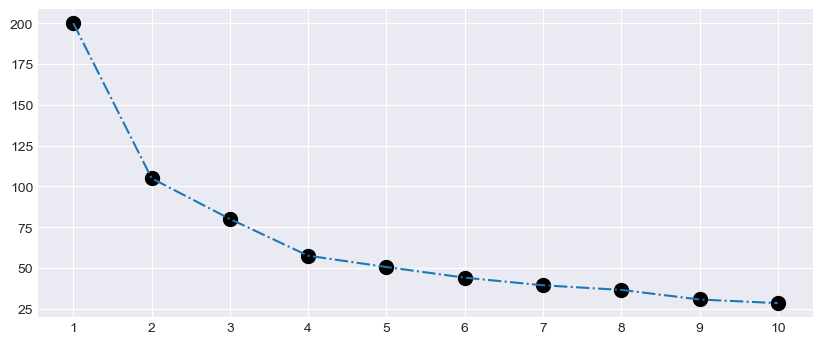

In [21]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

In [22]:
l

[200.00000000000003,
 104.96163315756871,
 80.08886132199622,
 57.55425863091104,
 50.62847998657812,
 44.110626579080815,
 39.44879101757742,
 36.61786182159536,
 30.758278605599443,
 28.5152668045627]

# SILHOUETTE

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
nc=range(2,11)
l=[]
for i in nc:

    model=AgglomerativeClustering(n_clusters=i,affinity='l2',linkage="complete")
    #model.fit_predict(scaled_fearures)
    l.append(silhouette_score(data_norm,model.fit_predict(data_norm)))

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated i

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_3024\4072156312.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


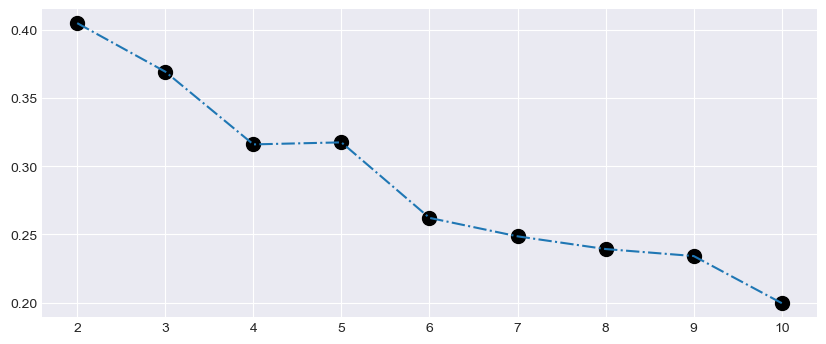

In [25]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(nc,l,s=100,color="black")
plt.plot(nc,l,linestyle="-.")
plt.xticks(nc)
plt.show()

In [26]:
l

[0.4047944502519567,
 0.36924314190439733,
 0.3159550742616455,
 0.3174348822319005,
 0.26210629404644226,
 0.24858582442028487,
 0.23927109755607495,
 0.234147786110546,
 0.19964248602938853]